In [29]:
import json
import numpy as np

json_file_path = '.json'
plotname = ''

with open(json_file_path, 'r') as j:
     contents = json.loads(j.read())

modelist = []
for trialid in contents:
    #print(contents[trialid]['trialData'])
    trialinfor_modelname = contents[trialid]['trialData']['machine_groundtruth']
    if trialinfor_modelname not in modelist:
        if len(trialinfor_modelname)>1:
            modelist.append(trialinfor_modelname)

#find unique list of models
print(modelist)
    
#initialize matrix of absolute counts   
result = {'human':0, 'countH':0, 'list_human':[], 'machine':0, 'countM': 0, 'list_machine':[]} #machine is overall AI; countM is the total num of AI ground truth
for modelname in modelist:
    result[modelname] = 0
    result['count_'+modelname] = 0
    result['list_' + modelname] = []
print(result)
        
# Iterating over keys
for trialid in contents:
    trialinfor = contents[trialid]['trialData']
    
    if trialinfor['groundtruth'] == 'human':
        result['countH'] = result['countH'] + 1
        if trialinfor['response_speaker'] == trialinfor['groundtruth']:
            result['human'] = result['human'] + 1
            result['list_human'].append(1)
        else:
            result['list_human'].append(0)    
    else:
        result['countM'] = result['countM'] + 1
        if trialinfor['response_speaker'] == trialinfor['groundtruth']:
            result['machine'] = result['machine'] + 1
            result['list_machine'].append(1)
        else:
            result['list_machine'].append(0)
        
        modelname = trialinfor['machine_groundtruth']
        result['count_'+modelname] = result['count_'+modelname] + 1
        if trialinfor['response_speaker'] == trialinfor['groundtruth']:
            result[modelname] = result[modelname] + 1
            result['list_' + modelname].append(1)
        else:
            result['list_'+modelname].append(0)
print(result)

#compute confusion matrix
result_conf_mat = np.zeros((2+len(modelist),2),'float32')
result_conf_mat[0][0] = result['human']/result['countH']
result_conf_mat[0][1] = (result['countH'] - result['human'])/result['countH']  
result_conf_mat[1][0] = (result['countM'] - result['machine'])/result['countM']
result_conf_mat[1][1] = result['machine']/result['countM']

for i, modelname in enumerate(modelist):
    result_conf_mat[i+2][0] = (result['count_'+modelname] - result[modelname])/result['count_'+modelname]
    result_conf_mat[i+2][1] = result[modelname]/result['count_'+modelname]

print(result_conf_mat)

## [CHANGE] -> compute std for each group of data; e.g. human and model1
#sanity_check
#mean and std computation
result_mean = []
result_std = [] #std for individual categories: e.g. humans alone, AI alone, each model alone
top_std = [] #std for overall classifcation accuracy; using boostrap

def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    #print(BootstrapTimes)        
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        #print(y1)
        y2 = random.sample(data2, SampleTimes)
        #print(y2)
        y_comb = y1+y2
        #print(y_comb)
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

print('Accuracies and stds are: ')
print('human = ' + str(sum(result['list_human'])/len(result['list_human'])))
result_mean.append(sum(result['list_human'])/len(result['list_human']))
result_std.append(np.std(np.array(result['list_human']), axis=0))

print('AI = ' + str(sum(result['list_machine'])/len(result['list_machine'])))
result_mean.append(sum(result['list_human'])/len(result['list_human']))
result_std.append(np.std(np.array(result['list_human']), axis=0))
top_std.append(boostrap(result['list_human'], result['list_machine']))

for modelname in modelist: 
    print(modelname + ' = ' + str(sum(result['list_' + modelname])/len(result['list_' + modelname])))
    result_mean.append(sum(result['list_' + modelname])/len(result['list_' + modelname]))
    result_std.append(np.std(np.array(result['list_' + modelname]), axis=0))
    top_std.append(boostrap(result['list_' + modelname], result['list_' + modelname]))

['blip', 'ofa', 'microsoft_api', 'clipcap', 'git']
{'human': 0, 'countH': 0, 'list_human': [], 'machine': 0, 'countM': 0, 'list_machine': [], 'blip': 0, 'count_blip': 0, 'list_blip': [], 'ofa': 0, 'count_ofa': 0, 'list_ofa': [], 'microsoft_api': 0, 'count_microsoft_api': 0, 'list_microsoft_api': [], 'clipcap': 0, 'count_clipcap': 0, 'list_clipcap': [], 'git': 0, 'count_git': 0, 'list_git': []}
{'human': 124, 'countH': 165, 'list_human': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'machine': 62, 'countM': 135, 'list_machine': [0, 0, 1, 1, 1, 

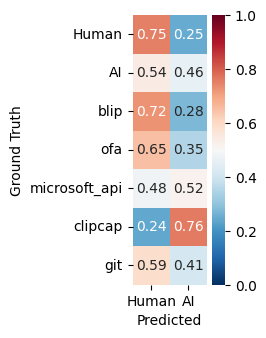

In [3]:
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(result_conf_mat, index = [i for i in ['Human','AI']+modelist],
                  columns = [i for i in ['Human','AI']])
plt.figure(figsize = (1.2,3.5))
sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1)

plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
 
plt.savefig('../' + plotname + '_confmat.png', bbox_inches='tight')
plt.show()


[[0.75151515 0.24848485]
 [0.5407407  0.45925927]
 [0.7241379  0.27586207]
 [0.6486486  0.35135135]
 [0.47826087 0.5217391 ]
 [0.2413793  0.7586207 ]
 [0.5882353  0.4117647 ]]


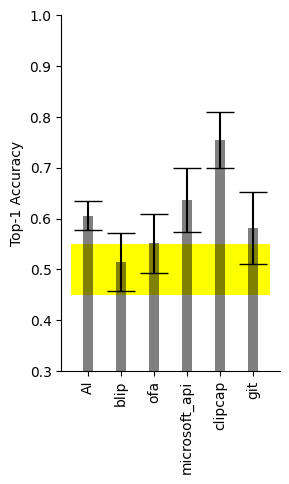

In [30]:
#compute top 1 accuracy for each AI model and also overall AI
top1 = []
print(result_conf_mat)
for i in range(1+len(modelist)):
    #print(i)
    top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
#print(top1)
#print(result_std)

import matplotlib.pyplot as plt
import numpy as np
 
#data
#x-axis
years = list(range(1, 2+len(modelist)))
strtask = ['AI'] + modelist
#print(years)
#print(strtask)

# Figure Size
fig, ax = plt.subplots()

## [CHANGE] -> add highlighted regions showing [0.45,0.55]
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((-0.5, 0.45), len(top1), 0.1,facecolor='yellow'))

## [CHANGE] -> add errorbars (standard deviation) to your barplot
#bar chart properties
ax.bar(strtask, top1, yerr=top_std,
       align='center', alpha=0.5, ecolor='black', capsize=10,
       color ='black', width = 0.3)
  
plt.ylabel('Top-1 Accuracy')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

## [CHANGE] -> change y axis to [0.3, 1]
plt.ylim(0.3, 1)
#plt.xlim(0.5, len(years)+0.5)

## [CHANGE] -> remove chance
#draw chance 0.5 
#chancex =np.arange(len(years))
#plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
#plt.legend()
#fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

fig.tight_layout()

fig.set_figwidth(2.5)
fig.set_figheight(5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
fig.savefig('../' + plotname + '.png', bbox_inches='tight')

[1 2 3 4 5 6]


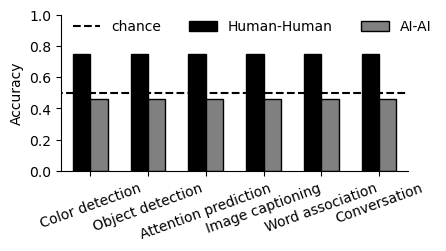

In [104]:
#the overall plots over tasks; comment out
# import matplotlib.pyplot as plt
# import numpy as np
 
# #data
# #x-axis
# years = [1, 2, 3, 4, 5, 6]
# strtask = ['Color detection', 'Object detection', 'Attention prediction','Image captioning','Word association', 'Conversation']
# #y-axis
# humanplot_y = [0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
# aiplot_y = [0.46, 0.46, 0.46, 0.46, 0.46, 0.46]
 
# #bar chart properties
# x = np.arange(len(years))+1
# print(x)
# width = 0.3
 
# #draw grouped bar chart
# fig, ax = plt.subplots()
# bar1 = ax.bar(x - width/2, humanplot_y, width, label='Human-Human',facecolor='black',edgecolor='black')
# bar2 = ax.bar(x + width/2, aiplot_y, width, label='AI-AI',facecolor='grey',edgecolor='black')
 
# #ax.set_xlabel('Year')
# ax.set_ylabel('Accuracy')
# #ax.set_title('Average expenses of ABC')
# ax.set_xticks(years)
# ax.set_xticklabels(strtask)
# plt.xticks(rotation = 20) # Rotates X-Axis Ticks by 45-degrees

# ax.set_ylim(0, 1.0)
# ax.set_xlim(0.5, len(years)+0.5)
# chancex =np.arange(len(years)+2)
# ax.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance')
# ax.legend()
 
# #setting bar labels
# #ax.bar_label(bar1, padding=13)
# #ax.bar_label(bar2, padding=13)
 
# fig.tight_layout()

# fig.set_figwidth(4)
# fig.set_figheight(2)

# ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.05), ncol=3, fancybox=True, shadow=True,frameon=False)
# #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# #ax.spines['bottom'].set_visible(False)
# #ax.spines['left'].set_visible(False)

# plt.show()
# fig.savefig('../fig4a.png', bbox_inches='tight')

In [26]:
def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        BootstrapTimes = math.ceil(len(data1)/2)
    else:
        BootstrapTimes = math.ceil(len(data2)/2)
    #print(BootstrapTimes)        
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, BootstrapTimes)
        #print(y1)
        y2 = random.sample(data2, BootstrapTimes)
        #print(y2)
        y_comb = y1+y2
        #print(y_comb)
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

x = np.random.normal(loc= 300.0, size=100).tolist()
y = np.random.normal(loc= 300.0, size=20).tolist()
std = boostrap(x,y)
print(std)

0.1858548885522585


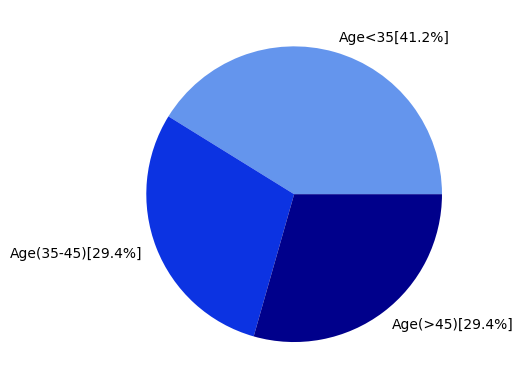

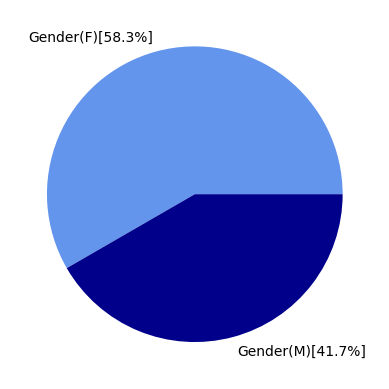

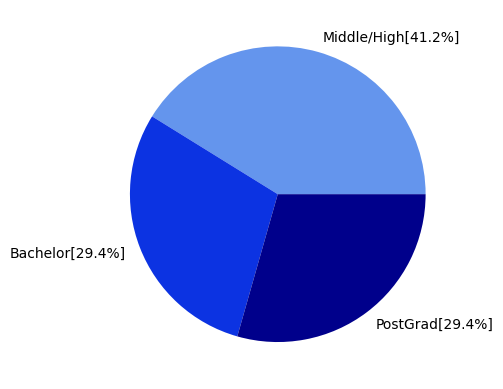

[23, 25, 28, 12, 6, 12, 13, 6, 16]
['23', '25', '28', '12', '6', '12', '13', '6', '16']


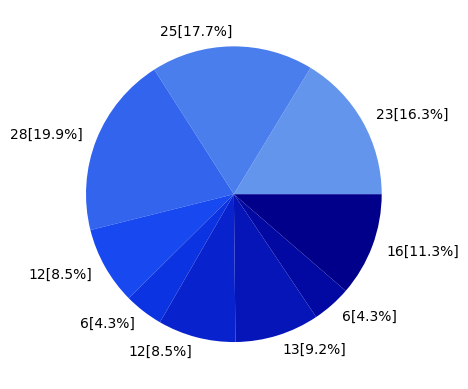

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from colour import Color
#!pip install colour

startColor = Color('#6495ED') #light blue
EndColor = Color("#00008B") #dark blue

#data: a list containing counts of each bin
#labels: for each data bin
#startcolor: fixed; do NOT change, always start from light blue
#endcolor: fixed; do NOT change, always end with dark blue
def plot_PieCharts(data, labels, startcolor, endcolor):
    
    #label must have same lengths as data
    #normalize the list of data so that sum is 1
    datanorm = [float(i)/sum(data) for i in data]
    labels_actual = []
    for i, item in enumerate(datanorm):
        labels_actual.append( labels[i]+ "[" + str("{:.1f}".format(item*100)) + "%]" )
    
    colors = list(startColor.range_to(EndColor,len(datanorm)))
    colorlist = []
    for item in colors:
        colorlist.append(item.hex)
    #print(colorlist)
    plt.pie(datanorm, labels = labels_actual, colors = colorlist, startangle = 0)
    plt.show() 


#age bins
agelist = np.array([35, 25, 25]) #number of counts within a bin
mylabels = ["Age<35", "Age(35-45)", "Age(>45)"]
plot_PieCharts(agelist, mylabels, startColor, EndColor)

#gender bins
agelist = np.array([35, 25]) #number of counts within a bin
mylabels = ["Gender(F)", "Gender(M)"]
plot_PieCharts(agelist, mylabels, startColor, EndColor)

#age bins
agelist = np.array([35, 25, 25]) #number of counts within a bin
mylabels = ["Middle/High","Bachelor","PostGrad"]
plot_PieCharts(agelist, mylabels, startColor, EndColor)

#random sequence for country and other demographic
#modify here for your own plots:
import random
randomlist = []
for i in range(0,9):
    n = random.randint(1,30)
    randomlist.append(n)
#print(randomlist)
mylabels = [str(i) for i in randomlist]
#print(mylabels)
plot_PieCharts(randomlist, mylabels, startColor, EndColor)

